In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 500)

plt.rc('figure', figsize=(16, 6))

sns.set(context='notebook', style = 'ticks', rc={'figure.figsize': (16,6)})

np.set_printoptions(precision=4, suppress=True)

In [2]:
stock = 'KO'

In [3]:
%ls -lrt stocks/KO

total 1968
-rw-r--r--  1 sam3  staff   75912 Jun 27  2020 INCOMESTATEMENT_QTR_KO.json
-rw-r--r--  1 sam3  staff   18775 Jun 27  2020 INCOMESTATEMENT_YR_KO.json
-rw-r--r--  1 sam3  staff   21472 Jun 27  2020 CASHFLOW_YR_KO.json
-rw-r--r--  1 sam3  staff   87744 Jun 27  2020 CASHFLOW_QTR_KO.json
-rw-r--r--  1 sam3  staff   27948 Jun 27  2020 BALANCESHEET_YR_KO.json
-rw-r--r--  1 sam3  staff  108756 Jun 27  2020 BALANCESHEET_QTR_KO.json
-rw-r--r--@ 1 sam3  staff  104514 Jun 29  2020 _Expenses.png
-rw-r--r--  1 sam3  staff  124856 Jun 30  2020 _Earnings.png
-rw-r--r--@ 1 sam3  staff   87169 Jun 26 14:39 _Revenue.png
-rw-r--r--  1 sam3  staff   84022 Jun 30 23:44 _Assets.png
-rw-r--r--  1 sam3  staff  108240 Jun 30 23:45 _Debt.png
-rw-r--r--  1 sam3  staff   59550 Jun 30 23:45 _Equity.png


In [4]:
df = pd.read_json('./stocks/{0}/CASHFLOW_YR_{0}.json'.format(stock))

In [5]:
#df.to_csv('{0}_BalanceSheet.csv'.format(stock),index=False)

In [6]:
df.columns

Index(['commonStockIssued', 'changeInWorkingCapital',
       'otherFinancingActivites', 'freeCashFlow', 'acceptedDate', 'period',
       'netCashProvidedByOperatingActivities', 'cashAtEndOfPeriod',
       'netCashUsedForInvestingActivites', 'accountsReceivables', 'inventory',
       'acquisitionsNet', 'finalLink', 'fillingDate',
       'otherInvestingActivites', 'netIncome', 'symbol',
       'investmentsInPropertyPlantAndEquipment', 'commonStockRepurchased',
       'accountsPayables', 'stockBasedCompensation', 'link',
       'operatingCashFlow', 'date', 'debtRepayment',
       'netCashUsedProvidedByFinancingActivities', 'otherNonCashItems',
       'otherWorkingCapital', 'dividendsPaid', 'cashAtBeginningOfPeriod',
       'netChangeInCash', 'salesMaturitiesOfInvestments',
       'effectOfForexChangesOnCash', 'depreciationAndAmortization',
       'purchasesOfInvestments', 'capitalExpenditure', 'deferredIncomeTax'],
      dtype='object')

In [10]:
df[['date', 'symbol','fillingDate', 'acceptedDate', 'period', 
    'netIncome', 'depreciationAndAmortization','deferredIncomeTax', 'stockBasedCompensation',
   'changeInWorkingCapital', 'accountsReceivables', 'inventory', 'accountsPayables',
    'otherWorkingCapital', 'otherNonCashItems', 'netCashProvidedByOperatingActivities',
    'investmentsInPropertyPlantAndEquipment','acquisitionsNet', 'purchasesOfInvestments',
    'salesMaturitiesOfInvestments','otherInvestingActivites','netCashUsedProvidedByFinancingActivities',
    'debtRepayment','commonStockIssued','commonStockRepurchased','dividendsPaid','otherFinancingActivites',
    'netCashUsedForInvestingActivites','effectOfForexChangesOnCash','netChangeInCash',
    'cashAtEndOfPeriod','cashAtBeginningOfPeriod',
    'operatingCashFlow','capitalExpenditure','freeCashFlow', 
    'link','finalLink'
   ]]

,date,symbol,fillingDate,acceptedDate,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,investmentsInPropertyPlantAndEquipment,acquisitionsNet,purchasesOfInvestments,salesMaturitiesOfInvestments,otherInvestingActivites,netCashUsedProvidedByFinancingActivities,debtRepayment,commonStockIssued,commonStockRepurchased,dividendsPaid,otherFinancingActivites,netCashUsedForInvestingActivites,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
0,2019-12-31,KO,2020-02-24,2020-02-24 16:08:17,FY,8985000000,1365000000,280000000,201000000,-7973000000,-158000000,-183000000,1318000000,-6562000000,0,10471000000,-2054000000,0,-1103000000,0,-819000000,-9004000000,-24850000000,1012000000,-1103000000,-6845000000,22782000000,-3976000000,-72000000,6480000000,6480000000,0,10471000000,2054000000,8417000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
1,2018-12-31,KO,2019-02-21,2019-02-21 16:55:42,FY,6476000000,1086000000,450000000,225000000,-7940000000,66000000,-171000000,-289000000,1411000000,0,7320000000,-1347000000,0,-1912000000,0,9607000000,-10552000000,-30568000000,1476000000,-1912000000,-6644000000,27096000000,6348000000,-262000000,8926000000,8926000000,0,7320000000,1347000000,5973000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
2,2017-12-31,KO,2018-02-23,2018-02-23 11:20:20,FY,1283000000,1260000000,1256000000,219000000,1873000000,-141000000,-355000000,-445000000,9351000000,0,6995000000,-1675000000,0,-3682000000,0,2972000000,-7409000000,-28768000000,1595000000,-3682000000,-6320000000,29766000000,-2385000000,242000000,-2549000000,6006000000,8555000000,6995000000,1675000000,5320000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
3,2016-12-31,KO,2017-02-24,2017-02-24 11:34:47,FY,6550000000,1787000000,856000000,258000000,1013000000,-28000000,-142000000,-540000000,7478000000,0,8796000000,-2262000000,0,-3681000000,0,4944000000,-6545000000,-25615000000,1434000000,-3681000000,-6043000000,27360000000,-999000000,-6000000,1246000000,8555000000,7309000000,8796000000,2262000000,6534000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
4,2015-12-31,KO,2016-02-25,2016-02-25 14:48:38,FY,7366000000,1970000000,-73000000,236000000,5853000000,-212000000,-250000000,1004000000,6465000000,0,10528000000,-2553000000,0,-3564000000,0,-69000000,-5113000000,-37738000000,1245000000,-3564000000,-5741000000,40685000000,-6186000000,-878000000,-1649000000,7309000000,8958000000,10528000000,2553000000,7975000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
5,2014-12-31,KO,2015-02-25,2015-02-25 15:11:06,FY,7124000000,1976000000,40000000,209000000,-2881000000,-253000000,35000000,-250000000,612000000,0,10615000000,-2406000000,0,-4162000000,0,-938000000,-3631000000,-36962000000,1532000000,-4162000000,-5350000000,41311000000,-7506000000,-934000000,-1456000000,8958000000,10414000000,10615000000,2406000000,8209000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
6,2013-12-31,KO,2014-02-27,2014-02-27 13:24:23,FY,8626000000,1977000000,-648000000,227000000,986000000,28000000,-105000000,-158000000,3493000000,0,10542000000,-2550000000,0,-4832000000,0,2557000000,-3745000000,-38714000000,1328000000,-4832000000,-4969000000,43442000000,-4825000000,-611000000,1972000000,10414000000,8442000000,10542000000,2550000000,7992000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
7,2012-12-31,KO,2013-02-27,2013-02-27 12:22:03,FY,9086000000,1982000000,-63200

In [14]:
df['my'] = df['date'].apply(lambda s: s.strftime("%b %y"))
df = df.set_index('my')
df = df.sort_values('date')

In [15]:
df['netIncome_mil']=df['netIncome']/1000000
df['commonStockRepurchased_mil']=df['commonStockRepurchased']/1000000
df['freeCashFlow_mil']=df['freeCashFlow']/1000000

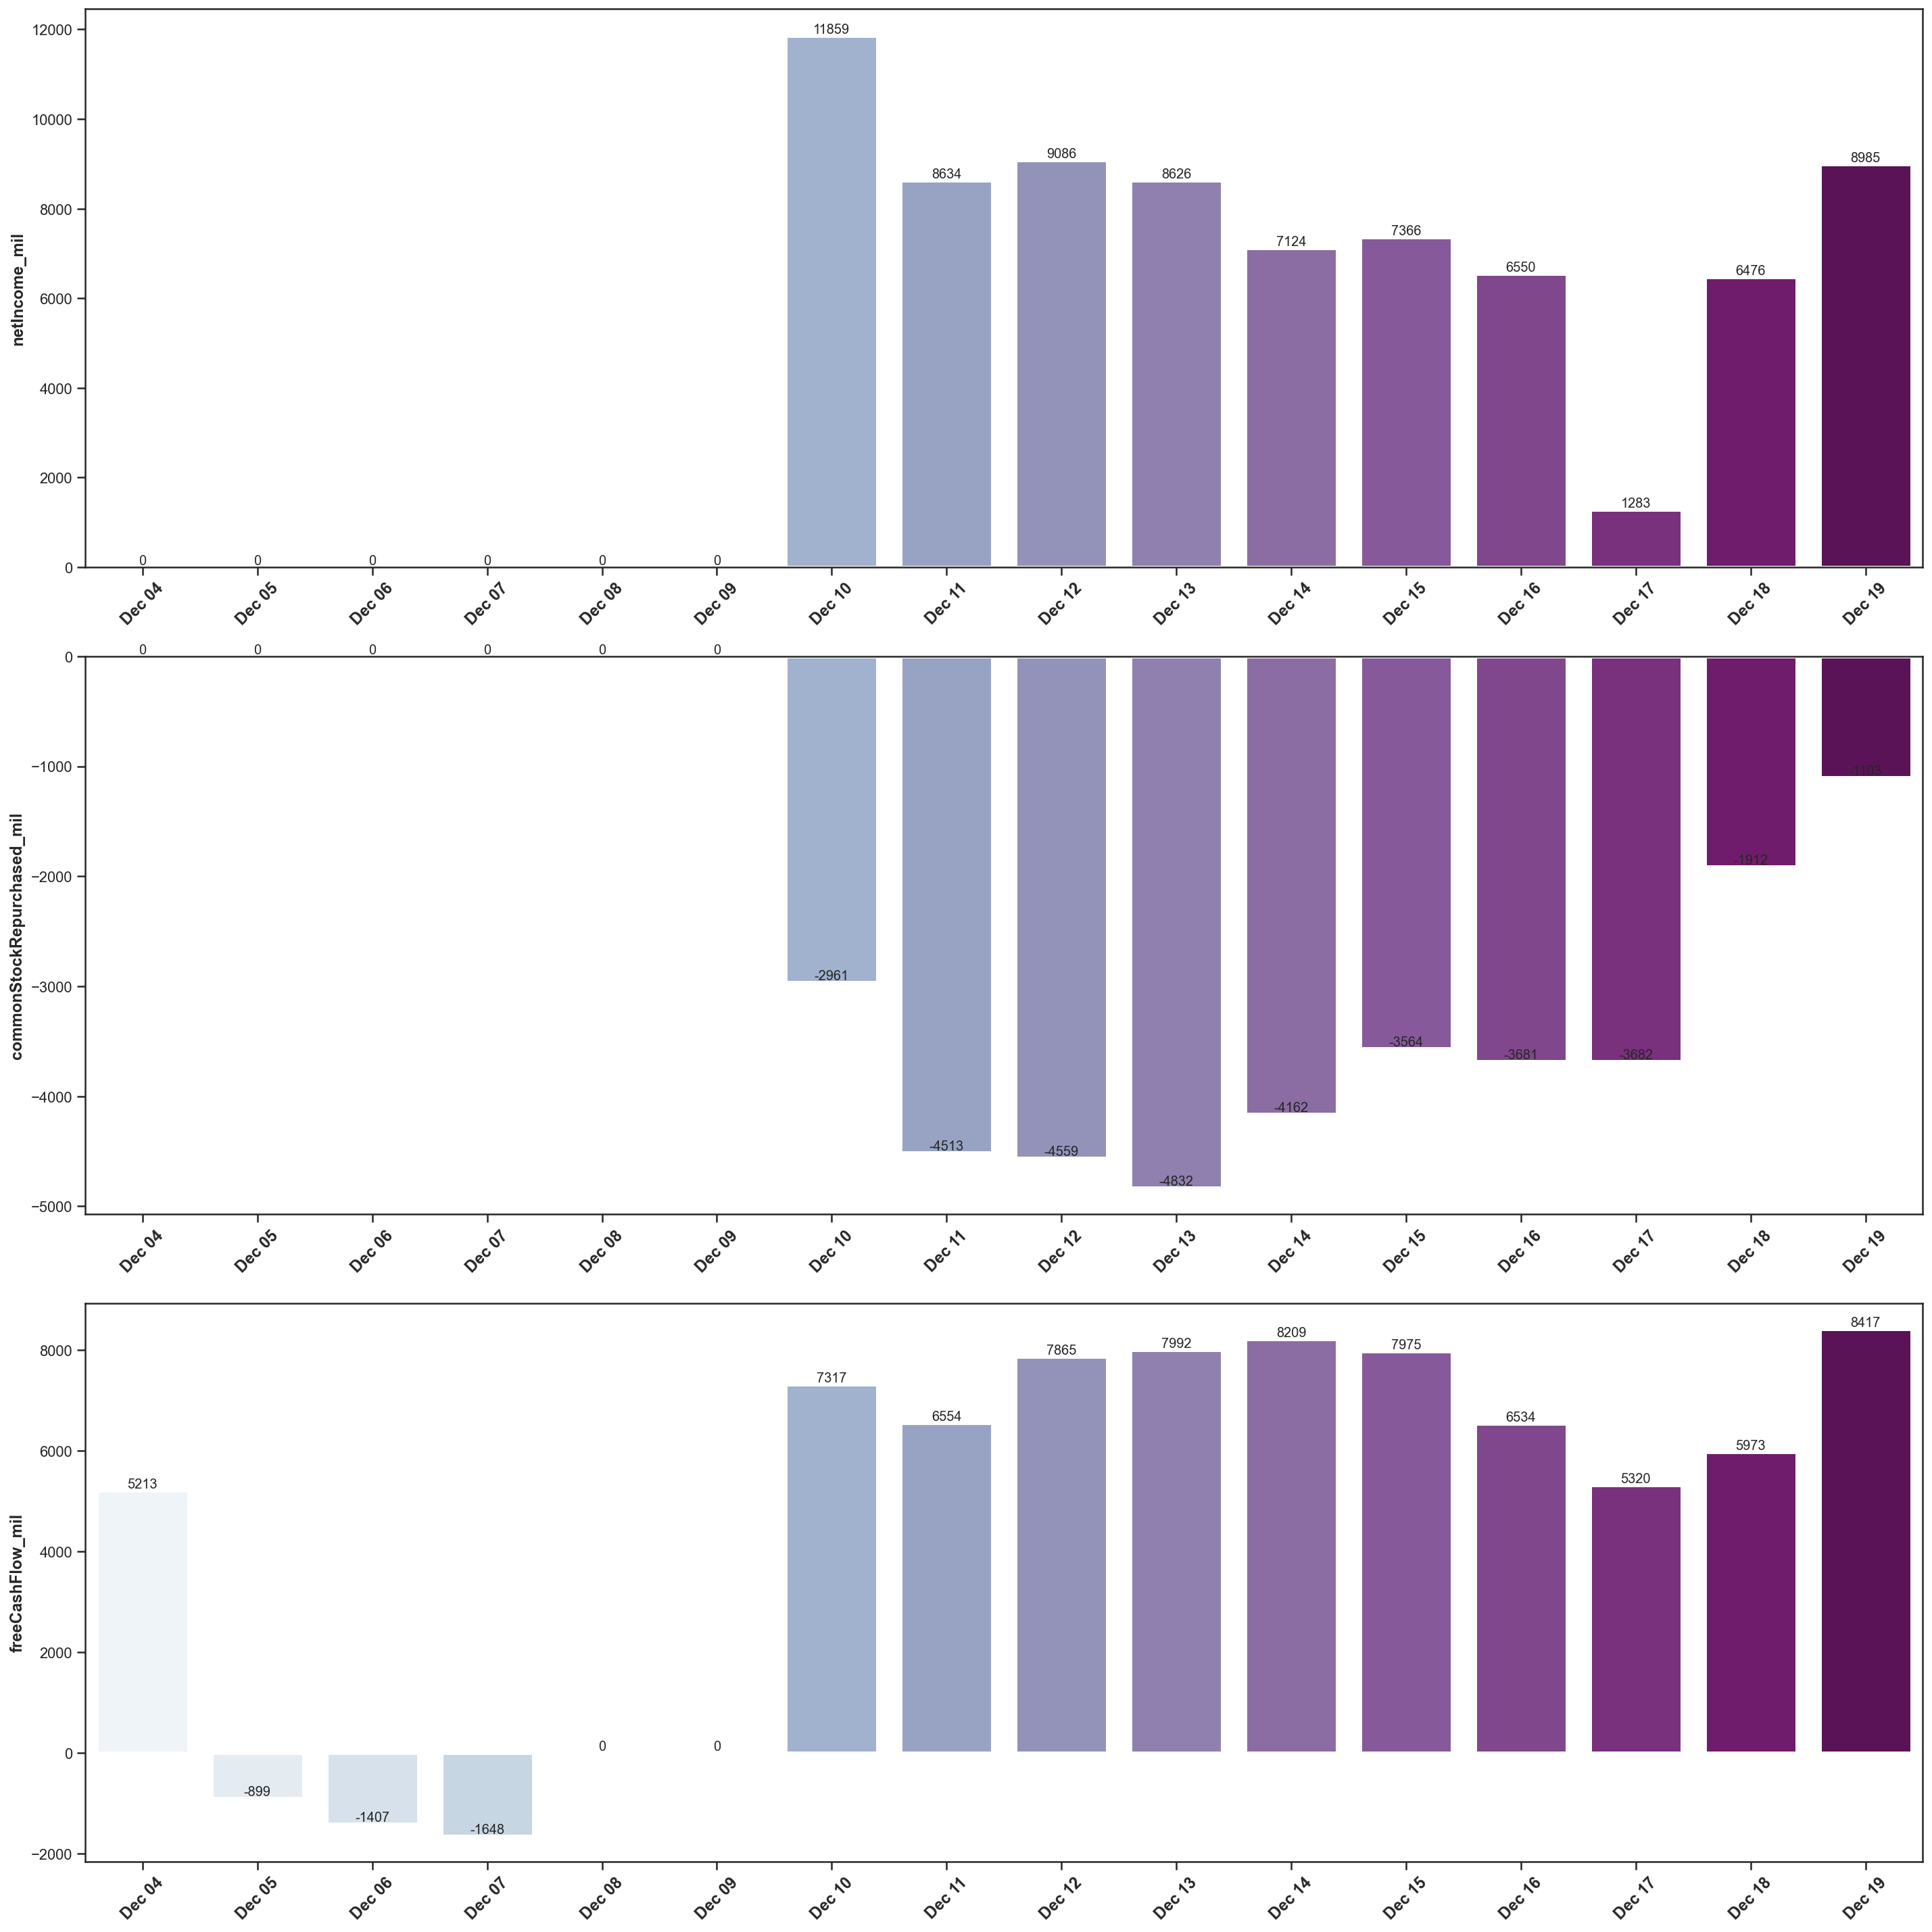

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,20))
fig.subplots_adjust(hspace =.3, wspace=.3)
axes = axes.ravel()
for i, col in enumerate(["netIncome_mil", "commonStockRepurchased_mil","freeCashFlow_mil"]):
    plot=sns.barplot(y=col, x=df.index, data=df, palette ="BuPu", ax=axes[i], linewidth = 2.5)
    plot.set_xticklabels(plot.get_xticklabels(),size= 12, rotation=45, fontweight='bold')
    plot.set_ylabel(col,size= 12, fontweight='bold')
    plot.set_xlabel('')
    for p in plot.patches:
        if 'ratio' in col.lower():
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%s' % str(round(float(p.get_height()),2))[1:], 
                fontsize=10, ha='center', va='bottom')
        else: 
            plot.text(p.get_x() + p.get_width()/2., # x coordinate of text
                p.get_height(), # y coordinate of text
                '%.0f' % float(p.get_height()), 
                fontsize=10, ha='center', va='bottom')
plt.savefig("./stocks/{0}/_CashFlow.png".format(stock), bbox_inches='tight')
plt.tight_layout();

### Cash Flow Statement
Cash flow statement breaks into three parts
    1. Cash flow from operating activities 
        - Net income + depreciation + amortization: these do not eat up any cash
    2. Cash flow from investing operations
        - Minus All capital expenditures 
        - Plus Other Investing Cash flow items (if more cash is expended, negative and opposite applies)
    3. Cash flow from financing activities
        - Payments of dividends
        - Buy (cash out of company) and selling (cash into company) company stock or bonds
        
        
        

### Additional Notes 
Source: Waren Buffett and Interpretation of Financial Statements

- Ch 51: Capital expenditures are outlays of cash or equivalent in assets that held longer than a year. Another way to think of it is assets that are expensed over a year through depreciation and amortization. If Capital expenditures / net earnings historically is under 50%, then you can start paying attention to this company. If < 25%, then company has a advantage
- Ch 52: Share buybacks decreases outstanding shares which increases shareholders' interest (emotional) in company and EPS, which should result into higher stock price. Then shareholders would have their wealth increase without paying taxes (compared to dividends where shareholders would have to pay taxes) 

Research other companies in that sector and compare these percentages as well

